In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 10)


In [2]:
df_lidar = pd.read_csv("/home/pierros/Documents/repos/Autonomous-Mobile-Robot-via-Machine-Learning/Data/raw_dataset_lidar.csv")
df_lidar

,Unnamed: 0,frame_id,time_sec,time_nanosec,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,range_max,ranges,intensities
0,0,base_scan,467,569000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,1,base_scan,467,769000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2,2,base_scan,467,969000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3,3,base_scan,468,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,4,base_scan,468,369000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,base_scan,627,369000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.78607696 0.7623259 0.73291117 0.6921672 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
800,800,base_scan,627,569000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.7896669 0.76030785 0.72601223 0.71659404 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
801,801,base_scan,627,769000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.7796455 0.74736875 0.72419274 0.707664 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
802,802,base_scan,627,969000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.78088635 0.75203294 0.73608536 0.71106905 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...


In [3]:
df_odom = pd.read_csv("/home/pierros/Documents/repos/Autonomous-Mobile-Robot-via-Machine-Learning/Data/raw_dataset_odom.csv")
df_odom

,Unnamed: 0,frame_id,time_sec,time_nanosec,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z,covariance_pos,covariance_vel
0,0,odom,467,566000000,-1.999914,-0.500001,0.008535,0.000004,-4.461494e-09,0.0,0.000049,0.002867,0.000006,0.999996,0.0,0.0,-5.281261e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
1,1,odom,467,600000000,-1.999914,-0.500001,0.008532,0.000004,-1.544134e-08,0.0,0.000049,0.002867,0.000006,0.999996,0.0,0.0,-6.322169e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
2,2,odom,467,634000000,-1.999914,-0.500001,0.008530,0.000004,-2.503905e-08,0.0,0.000049,0.002867,0.000006,0.999996,0.0,0.0,-6.790388e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
3,3,odom,467,668000000,-1.999914,-0.500001,0.008533,0.000002,-9.427778e-10,0.0,0.000049,0.002868,0.000006,0.999996,0.0,0.0,-6.466611e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4,4,odom,467,702000000,-1.999914,-0.500001,0.008527,0.000002,-2.889666e-08,0.0,0.000049,0.002868,0.000006,0.999996,0.0,0.0,-8.106536e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,4724,odom,628,182000000,-1.888463,-1.208647,0.008532,0.000007,-1.422875e-06,0.0,0.002702,-0.000966,-0.949801,-0.312843,0.0,0.0,1.700509e-06,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4725,4725,odom,628,216000000,-1.888463,-1.208647,0.008530,0.000003,2.016982e-06,0.0,0.002707,-0.000965,-0.949801,-0.312843,0.0,0.0,6.126344e-07,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4726,4726,odom,628,250000000,-1.888463,-1.208647,0.008527,0.000004,-3.155158e-06,0.0,0.002709,-0.000963,-0.949801,-0.312843,0.0,0.0,1.010044e-06,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4727,4727,odom,628,284000000,-1.888463,-1.208647,0.008533,0.000003,2.591829e-06,0.0,0.002710,-0.000961,-0.949801,-0.312843,0.0,0.0,8.962890e-07,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...


In [4]:
df_data = df_lidar.merge(df_odom, how="left", on="time_nanosec")
df_data = df_data.drop(["Unnamed: 0_x","Unnamed: 0_y","time_sec_x","time_sec_y"], axis=1)
df_data = df_data.dropna()
df_data = df_data.reset_index()
df_data

,index,frame_id_x,time_nanosec,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,range_max,ranges,intensities,frame_id_y,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z,covariance_pos,covariance_vel
0,3,base_scan,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,-1.999914,-0.500001,0.008529,0.000003,-3.035067e-08,0.0,0.000049,0.002866,0.000006,0.999996,0.0,0.0,-7.606015e-08,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
1,4,base_scan,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,-1.988523,-0.500001,0.008526,0.009998,-5.973375e-08,0.0,0.000049,0.002875,0.000007,0.999996,0.0,0.0,-1.562910e-07,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
2,5,base_scan,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,0.520333,-0.500573,0.008521,-0.002510,7.523793e-04,0.0,-0.001564,0.002512,0.369857,0.929084,0.0,0.0,1.284685e+00,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
3,6,base_scan,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,0.390956,0.623249,0.008529,-0.000186,-3.519090e-07,0.0,-0.002861,0.000275,0.999949,0.009649,0.0,0.0,9.989061e-02,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
4,7,base_scan,168000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[ inf inf inf inf ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,-1.599135,0.505794,0.008501,0.000155,1.437565e-05,0.0,-0.003088,0.000036,0.999945,-0.009979,0.0,0.0,-1.002766e-01,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1106,base_scan,968000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.771998 0.7680165 0.7241286 0.7111183 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,-1.604862,0.596989,0.008542,0.124336,6.198563e-06,0.0,-0.002005,0.001938,0.721387,0.692527,0.0,0.0,-1.715486e-05,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
346,1107,base_scan,968000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.771998 0.7680165 0.7241286 0.7111183 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,-0.251264,1.586428,0.008534,0.220007,5.721590e-07,0.0,0.000074,0.002875,-0.017042,0.999851,0.0,0.0,1.816680e-07,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
347,1108,base_scan,968000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.771998 0.7680165 0.7241286 0.7111183 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,1.527227,1.474583,0.008537,0.099984,5.998158e-06,0.0,0.002079,0.001952,-0.707786,0.706421,0.0,0.0,-3.299349e-04,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...
348,1109,base_scan,968000000,0.0,6.28,0.017493,0.0,0.0,0.12,3.5,[0.771998 0.7680165 0.7241286 0.7111183 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,odom,1.519910,-1.537009,0.008531,-0.000525,-1.436924e-04,0.0,0.002857,0.000253,-0.998590,0.053014,0.0,0.0,5.087700e-01,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...,[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e...


In [5]:
def expand_column(df, column_name):
    # Remove brackets and extra spaces/newlines, then split into individual values
    clean_data = df[column_name].apply(lambda x: x.replace('[', '').replace(']', '').replace('\n', ' ').strip().split())
    # Convert 'inf' to np.inf and convert values to float
    clean_data = clean_data.apply(lambda x: [np.inf if v == 'inf' else float(v) for v in x])
    
    # Create a new DataFrame with the expanded columns
    expanded_df = pd.DataFrame(clean_data.tolist(), index=df.index)
    # Rename the columns
    expanded_df.columns = [f"{column_name}_{i+1}" for i in range(expanded_df.shape[1])]
    
    return expanded_df

In [6]:
df_data = pd.concat([df_data, expand_column(df_data, 'ranges')], axis=1)
df_data = pd.concat([df_data, expand_column(df_data, 'intensities')], axis=1)
df_data = pd.concat([df_data, expand_column(df_data, 'covariance_pos')], axis=1)
df_data = pd.concat([df_data, expand_column(df_data, 'covariance_vel')], axis=1)
df_data = df_data.drop(["index","ranges","intensities","covariance_pos","covariance_vel"], axis=1)
df_data = df_data.drop_duplicates()
df_data

,frame_id_x,time_nanosec,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,range_max,frame_id_y,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z,ranges_1,ranges_2,ranges_3,ranges_4,ranges_5,ranges_6,ranges_7,ranges_8,ranges_9,ranges_10,ranges_11,ranges_12,ranges_13,ranges_14,ranges_15,ranges_16,ranges_17,ranges_18,ranges_19,ranges_20,ranges_21,ranges_22,ranges_23,ranges_24,ranges_25,ranges_26,ranges_27,ranges_28,ranges_29,ranges_30,ranges_31,ranges_32,ranges_33,ranges_34,ranges_35,ranges_36,ranges_37,ranges_38,ranges_39,ranges_40,ranges_41,ranges_42,ranges_43,ranges_44,ranges_45,ranges_46,ranges_47,ranges_48,ranges_49,ranges_50,ranges_51,ranges_52,ranges_53,ranges_54,ranges_55,ranges_56,ranges_57,ranges_58,ranges_59,ranges_60,ranges_61,ranges_62,ranges_63,ranges_64,ranges_65,ranges_66,ranges_67,ranges_68,ranges_69,ranges_70,ranges_71,ranges_72,ranges_73,ranges_74,ranges_75,ranges_76,ranges_77,ranges_78,ranges_79,ranges_80,ranges_81,ranges_82,ranges_83,ranges_84,ranges_85,ranges_86,ranges_87,ranges_88,ranges_89,ranges_90,ranges_91,ranges_92,ranges_93,ranges_94,ranges_95,ranges_96,ranges_97,ranges_98,ranges_99,ranges_100,ranges_101,ranges_102,ranges_103,ranges_104,ranges_105,ranges_106,ranges_107,ranges_108,ranges_109,ranges_110,ranges_111,ranges_112,ranges_113,ranges_114,ranges_115,ranges_116,ranges_117,ranges_118,ranges_119,ranges_120,ranges_121,ranges_122,ranges_123,ranges_124,ranges_125,ranges_126,ranges_127,ranges_128,ranges_129,ranges_130,ranges_131,ranges_132,ranges_133,ranges_134,ranges_135,ranges_136,ranges_137,ranges_138,ranges_139,ranges_140,ranges_141,ranges_142,ranges_143,ranges_144,ranges_145,ranges_146,ranges_147,ranges_148,ranges_149,ranges_150,ranges_151,ranges_152,ranges_153,ranges_154,ranges_155,ranges_156,ranges_157,ranges_158,ranges_159,ranges_160,ranges_161,ranges_162,ranges_163,ranges_164,ranges_165,ranges_166,ranges_167,ranges_168,ranges_169,ranges_170,ranges_171,ranges_172,ranges_173,ranges_174,ranges_175,ranges_176,ranges_177,ranges_178,ranges_179,ranges_180,ranges_181,ranges_182,ranges_183,ranges_184,ranges_185,ranges_186,ranges_187,ranges_188,ranges_189,ranges_190,ranges_191,ranges_192,ranges_193,ranges_194,ranges_195,ranges_196,ranges_197,ranges_198,ranges_199,ranges_200,ranges_201,ranges_202,ranges_203,ranges_204,ranges_205,ranges_206,ranges_207,ranges_208,ranges_209,ranges_210,ranges_211,ranges_212,ranges_213,ranges_214,ranges_215,ranges_216,ranges_217,ranges_218,ranges_219,ranges_220,ranges_221,ranges_222,ranges_223,ranges_224,ranges_225,ranges_226,ranges_227,ranges_228,ranges_229,ranges_230,ranges_231,ranges_232,ranges_233,ranges_234,ranges_235,ranges_236,ranges_237,ranges_238,ranges_239,ranges_240,ranges_241,ranges_242,ranges_243,ranges_244,ranges_245,ranges_246,ranges_247,ranges_248,ranges_249,ranges_250,ranges_251,ranges_252,ranges_253,ranges_254,ranges_255,ranges_256,ranges_257,ranges_258,ranges_259,ranges_260,ranges_261,ranges_262,ranges_263,ranges_264,ranges_265,ranges_266,ranges_267,ranges_268,ranges_269,ranges_270,ranges_271,ranges_272,ranges_273,ranges_274,ranges_275,ranges_276,ranges_277,ranges_278,ranges_279,ranges_280,ranges_281,ranges_282,ranges_283,ranges_284,ranges_285,ranges_286,ranges_287,ranges_288,ranges_289,ranges_290,ranges_291,ranges_292,ranges_293,ranges_294,ranges_295,ranges_296,ranges_297,ranges_298,ranges_299,ranges_300,ranges_301,ranges_302,ranges_303,ranges_304,ranges_305,ranges_306,ranges_307,ranges_308,ranges_309,ranges_310,ranges_311,ranges_312,ranges_313,ranges_314,ranges_315,ranges_316,ranges_317,ranges_318,ranges_319,ranges_320,ranges_321,ranges_322,ranges_323,ranges_324,ranges_325,ranges_326,ranges_327,ranges_328,ranges_329,ranges_330,ranges_331,ranges_332,ranges_333,ranges_334,ranges_335,ranges_336,ranges_337,ranges_338,ranges_339,ranges_340,ranges_341,ranges_342,ranges_343,ranges_344,ranges_345,ranges_346,ranges_347,ranges_348,ranges_349,ranges

In [7]:
# # Assuming row_index is the index of the row you want to plot
# row_index = 0

# # Select columns starting with 'ColumnX'
# columns_to_plot = df_data.filter(regex='^ranges_').columns

# # Extract data for the specified row and columns
# data_to_plot = df_data.loc[row_index, columns_to_plot]

# # Plotting radar plot
# plt.figure(figsize=(8, 6))
# sns.lineplot(x=data_to_plot.index, y=data_to_plot.values)
# plt.fill_between(data_to_plot.index, data_to_plot.values, alpha=0.2)
# plt.title('Radar Plot of ColumnX for Row {}'.format(row_index))
# plt.xlabel('Columns')
# plt.ylabel('Values')
# plt.xticks(rotation=45)
# plt.show()

In [8]:
df = df_data.copy()
df

,frame_id_x,time_nanosec,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,range_max,frame_id_y,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,orientation_x,orientation_y,orientation_z,orientation_w,omega_x,omega_y,omega_z,ranges_1,ranges_2,ranges_3,ranges_4,ranges_5,ranges_6,ranges_7,ranges_8,ranges_9,ranges_10,ranges_11,ranges_12,ranges_13,ranges_14,ranges_15,ranges_16,ranges_17,ranges_18,ranges_19,ranges_20,ranges_21,ranges_22,ranges_23,ranges_24,ranges_25,ranges_26,ranges_27,ranges_28,ranges_29,ranges_30,ranges_31,ranges_32,ranges_33,ranges_34,ranges_35,ranges_36,ranges_37,ranges_38,ranges_39,ranges_40,ranges_41,ranges_42,ranges_43,ranges_44,ranges_45,ranges_46,ranges_47,ranges_48,ranges_49,ranges_50,ranges_51,ranges_52,ranges_53,ranges_54,ranges_55,ranges_56,ranges_57,ranges_58,ranges_59,ranges_60,ranges_61,ranges_62,ranges_63,ranges_64,ranges_65,ranges_66,ranges_67,ranges_68,ranges_69,ranges_70,ranges_71,ranges_72,ranges_73,ranges_74,ranges_75,ranges_76,ranges_77,ranges_78,ranges_79,ranges_80,ranges_81,ranges_82,ranges_83,ranges_84,ranges_85,ranges_86,ranges_87,ranges_88,ranges_89,ranges_90,ranges_91,ranges_92,ranges_93,ranges_94,ranges_95,ranges_96,ranges_97,ranges_98,ranges_99,ranges_100,ranges_101,ranges_102,ranges_103,ranges_104,ranges_105,ranges_106,ranges_107,ranges_108,ranges_109,ranges_110,ranges_111,ranges_112,ranges_113,ranges_114,ranges_115,ranges_116,ranges_117,ranges_118,ranges_119,ranges_120,ranges_121,ranges_122,ranges_123,ranges_124,ranges_125,ranges_126,ranges_127,ranges_128,ranges_129,ranges_130,ranges_131,ranges_132,ranges_133,ranges_134,ranges_135,ranges_136,ranges_137,ranges_138,ranges_139,ranges_140,ranges_141,ranges_142,ranges_143,ranges_144,ranges_145,ranges_146,ranges_147,ranges_148,ranges_149,ranges_150,ranges_151,ranges_152,ranges_153,ranges_154,ranges_155,ranges_156,ranges_157,ranges_158,ranges_159,ranges_160,ranges_161,ranges_162,ranges_163,ranges_164,ranges_165,ranges_166,ranges_167,ranges_168,ranges_169,ranges_170,ranges_171,ranges_172,ranges_173,ranges_174,ranges_175,ranges_176,ranges_177,ranges_178,ranges_179,ranges_180,ranges_181,ranges_182,ranges_183,ranges_184,ranges_185,ranges_186,ranges_187,ranges_188,ranges_189,ranges_190,ranges_191,ranges_192,ranges_193,ranges_194,ranges_195,ranges_196,ranges_197,ranges_198,ranges_199,ranges_200,ranges_201,ranges_202,ranges_203,ranges_204,ranges_205,ranges_206,ranges_207,ranges_208,ranges_209,ranges_210,ranges_211,ranges_212,ranges_213,ranges_214,ranges_215,ranges_216,ranges_217,ranges_218,ranges_219,ranges_220,ranges_221,ranges_222,ranges_223,ranges_224,ranges_225,ranges_226,ranges_227,ranges_228,ranges_229,ranges_230,ranges_231,ranges_232,ranges_233,ranges_234,ranges_235,ranges_236,ranges_237,ranges_238,ranges_239,ranges_240,ranges_241,ranges_242,ranges_243,ranges_244,ranges_245,ranges_246,ranges_247,ranges_248,ranges_249,ranges_250,ranges_251,ranges_252,ranges_253,ranges_254,ranges_255,ranges_256,ranges_257,ranges_258,ranges_259,ranges_260,ranges_261,ranges_262,ranges_263,ranges_264,ranges_265,ranges_266,ranges_267,ranges_268,ranges_269,ranges_270,ranges_271,ranges_272,ranges_273,ranges_274,ranges_275,ranges_276,ranges_277,ranges_278,ranges_279,ranges_280,ranges_281,ranges_282,ranges_283,ranges_284,ranges_285,ranges_286,ranges_287,ranges_288,ranges_289,ranges_290,ranges_291,ranges_292,ranges_293,ranges_294,ranges_295,ranges_296,ranges_297,ranges_298,ranges_299,ranges_300,ranges_301,ranges_302,ranges_303,ranges_304,ranges_305,ranges_306,ranges_307,ranges_308,ranges_309,ranges_310,ranges_311,ranges_312,ranges_313,ranges_314,ranges_315,ranges_316,ranges_317,ranges_318,ranges_319,ranges_320,ranges_321,ranges_322,ranges_323,ranges_324,ranges_325,ranges_326,ranges_327,ranges_328,ranges_329,ranges_330,ranges_331,ranges_332,ranges_333,ranges_334,ranges_335,ranges_336,ranges_337,ranges_338,ranges_339,ranges_340,ranges_341,ranges_342,ranges_343,ranges_344,ranges_345,ranges_346,ranges_347,ranges_348,ranges_349,ranges

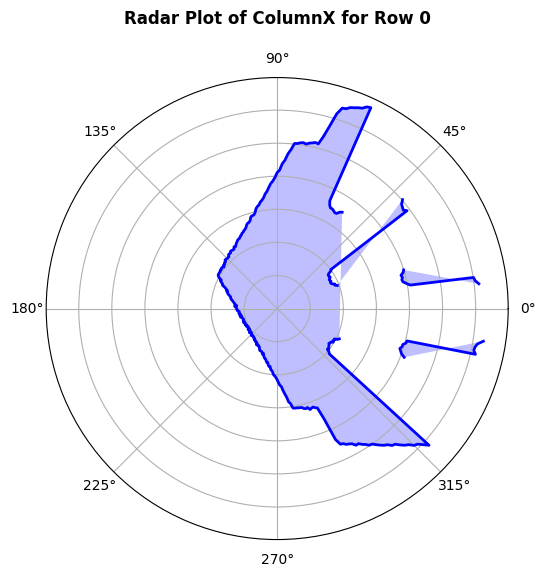

In [9]:
def radar_plot(df,index):
    # Replace np.inf with np.nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Assuming row_index is the index of the row you want to plot
    row_index = index

    # Select columns starting with 'ColumnX'
    columns_to_plot = df.filter(regex='^ranges_').columns

    # Convert selected columns to numeric
    df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')

    # Extract data for the specified row and columns
    data_to_plot = df.loc[row_index, columns_to_plot]

    # Check if data_to_plot is empty or all NaNs
    if data_to_plot.isnull().all():
        print(f"No valid data found for Row {row_index}. Radar plot cannot be generated.")
    else:
        # Number of variables
        num_vars = len(columns_to_plot)

        # Compute angle for each axis
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
        data_to_plot = np.concatenate((data_to_plot.values, [data_to_plot.values[0]]))
        angles += angles[:1]

        # Plotting radar plot
        fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, data_to_plot, color='blue', alpha=0.25)
        ax.plot(angles, data_to_plot, color='blue', linewidth=2)
        ax.set_yticklabels([])  # Hide radial ticks
        # ax.set_xticks(angles[:-1])  # Set the ticks to be at the angles of each variable
        # ax.set_xticklabels(columns_to_plot, fontsize=10, fontweight='bold', ha='center')  # Label the axes

        ax.set_title(f'Radar Plot of ColumnX for Row {row_index}', fontsize=12, fontweight='bold', pad=20)  # Title of the plot
        plt.show()
radar_plot(df, 0)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Assuming df is your DataFrame containing the data

# Function definition
def radar_plot(df, index):
    # Replace np.inf with np.nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Assuming row_index is the index of the row you want to plot
    row_index = index

    # Select columns starting with 'ColumnX'
    columns_to_plot = df.filter(regex='^ranges_').columns

    # Convert selected columns to numeric
    df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')

    # Extract data for the specified row and columns
    data_to_plot = df.loc[row_index, columns_to_plot]

    # Check if data_to_plot is empty or all NaNs
    if data_to_plot.isnull().all():
        print(f"No valid data found for Row {row_index}. Radar plot cannot be generated.")
    else:
        # Number of variables
        num_vars = len(columns_to_plot)

        # Compute angle for each axis
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
        data_to_plot = np.concatenate((data_to_plot.values, [data_to_plot.values[0]]))
        angles += angles[:1]

        # Plotting radar plot
        fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, data_to_plot, color='blue', alpha=0.25)
        ax.plot(angles, data_to_plot, color='blue', linewidth=2)
        ax.set_yticklabels([])  # Hide radial ticks

        ax.set_title(f'Radar Plot of ColumnX for Row {row_index}', fontsize=12, fontweight='bold', pad=20)  # Title of the plot

        # Save figure as image
        fig_filename = f'Data/radar_plot_row_{row_index}.png'
        plt.savefig(fig_filename)
        plt.close()

        return fig_filename

# Generating radar plot frames for each row
output_dir = 'radar_plot_frames'
os.makedirs(output_dir, exist_ok=True)

# Iterate through each row index and generate radar plot
for idx in range(len(df)):
    fig_filename = radar_plot(df, idx)
    print(f"Generated radar plot for Row {idx}.")

print(f"All radar plots generated. Frames saved in '{output_dir}'.")


Generated radar plot for Row 0.
Generated radar plot for Row 1.
Generated radar plot for Row 2.
Generated radar plot for Row 3.
Generated radar plot for Row 4.
Generated radar plot for Row 5.
Generated radar plot for Row 6.
Generated radar plot for Row 7.
Generated radar plot for Row 8.
Generated radar plot for Row 9.
Generated radar plot for Row 10.
Generated radar plot for Row 11.
Generated radar plot for Row 12.
Generated radar plot for Row 13.
Generated radar plot for Row 14.
Generated radar plot for Row 15.
Generated radar plot for Row 16.
Generated radar plot for Row 17.
Generated radar plot for Row 18.
Generated radar plot for Row 19.
Generated radar plot for Row 20.
Generated radar plot for Row 21.
Generated radar plot for Row 22.
Generated radar plot for Row 23.
Generated radar plot for Row 24.
Generated radar plot for Row 25.
Generated radar plot for Row 26.
Generated radar plot for Row 27.
Generated radar plot for Row 28.
Generated radar plot for Row 29.
Generated radar plot

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def radar_plot_with_velocity(df, index):
    # Replace np.inf with np.nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Assuming row_index is the index of the row you want to plot
    row_index = index

    # Select columns starting with 'ColumnX'
    columns_to_plot = df.filter(regex='^ranges_').columns

    # Convert selected columns to numeric
    df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')

    # Extract data for the specified row and columns
    data_to_plot = df.loc[row_index, columns_to_plot]

    # Extract velocity_x and velocity_y
    velocity_x = df.loc[row_index, 'velocity_x']
    velocity_y = df.loc[row_index, 'velocity_y']

    # Check if data_to_plot is empty or all NaNs
    if data_to_plot.isnull().all():
        print(f"No valid data found for Row {row_index}. Radar plot cannot be generated.")
    else:
        # Number of variables
        num_vars = len(columns_to_plot)

        # Compute angle for each axis
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
        data_to_plot = np.concatenate((data_to_plot.values, [data_to_plot.values[0]]))
        angles += angles[:1]

        # Plotting radar plot
        fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, data_to_plot, color='blue', alpha=0.25)
        ax.plot(angles, data_to_plot, color='blue', linewidth=2)
        ax.set_yticklabels([])  # Hide radial tickss

        # Compute the velocity vector's angle and length
        velocity_magnitude = np.sqrt(velocity_x*100 + velocity_y*100)
        velocity_angle = np.arctan2(velocity_y, velocity_x)

        # Normalize velocity to a reasonable scale for the plot
        max_range_value = data_to_plot.max()
        scale_factor = max_range_value / velocity_magnitude if velocity_magnitude != 0 else 1

        # Plot the velocity vector from the center
        ax.quiver(0, 0, np.cos(velocity_angle) * scale_factor, np.sin(velocity_angle) * scale_factor,
                  angles='xy', scale_units='xy', scale=1, color='red', width=0.005)

        ax.set_title(f'Radar Plot of ColumnX with Velocity for Row {row_index}', fontsize=12, fontweight='bold', pad=20)  # Title of the plot

        # Save figure as image
        fig_filename = f'radar_plot_with_velocity_frames/radar_plot_with_velocity_row_{row_index}.png'
        plt.savefig(fig_filename)
        plt.close()

        return fig_filename

# Generating radar plot frames for each row with velocity vector
output_dir = 'radar_plot_with_velocity_frames'
os.makedirs(output_dir, exist_ok=True)

# Iterate through each row index and generate radar plot with velocity vector
fig_filename = radar_plot_with_velocity(df_data, 0)
print(f"Generated radar plot with velocity vector for Row {0}.")

print(f"All radar plots with velocity vectors generated. Frames saved in '{output_dir}'.")

# radar_plot_with_velocity(df_data,0)

Generated radar plot with velocity vector for Row 0.
All radar plots with velocity vectors generated. Frames saved in 'radar_plot_with_velocity_frames'.


/home/pierros/anaconda3/envs/ml_project/lib/python3.11/site-packages/numpy/_core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
